In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

bat = pd.read_csv('data/Batting.csv')

print(bat.info())
bat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  101332 non-null  object 
 1   yearID    101332 non-null  int64  
 2   stint     101332 non-null  int64  
 3   teamID    101332 non-null  object 
 4   lgID      100595 non-null  object 
 5   G         101332 non-null  int64  
 6   AB        96183 non-null   float64
 7   R         96183 non-null   float64
 8   H         96183 non-null   float64
 9   2B        96183 non-null   float64
 10  3B        96183 non-null   float64
 11  HR        96183 non-null   float64
 12  RBI       95759 non-null   float64
 13  SB        94883 non-null   float64
 14  CS        72729 non-null   float64
 15  BB        96183 non-null   float64
 16  SO        88345 non-null   float64
 17  IBB       59620 non-null   float64
 18  HBP       93373 non-null   float64
 19  SH        89845 non-null   float64
 20  SF  

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


# Homeruns by Year

In [2]:
year_HR = bat[['yearID','HR']].copy()
year_HR = year_HR.groupby(['yearID']).sum()
year_HR

,HR
yearID,
1871,47.0
1872,35.0
1873,46.0
1874,40.0
1875,40.0
...,...
2011,4552.0
2012,4934.0
2013,4661.0


<AxesSubplot:title={'center':'Homeruns by Year'}, xlabel='yearID', ylabel='HR'>

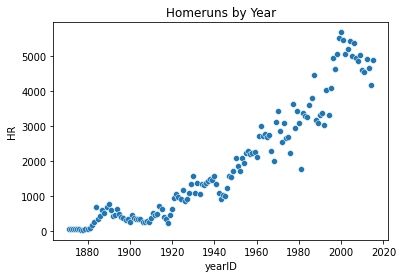

In [24]:
plott = sns.scatterplot(x="yearID", y="HR",data=year_HR);
plt.title('Homeruns by Year')
plott

In [169]:
br = bat.loc[(bat['playerID']=='ruthba01')]
br = br[['yearID','HR']].copy()
br = br.groupby(['yearID']).sum()
br.head()

,HR
yearID,
1914,0.0
1915,4.0
1916,3.0
1917,2.0
1918,11.0


# yankees vs. all (homeruns)

In [67]:
teams = pd.read_csv('data/Teams.csv')
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [68]:
teams['lgID'].value_counts()
# we are going to split into two tables, American League (AL) and National League (NL)
# we want only the top divisions and data from 1912 onwards

NL = teams.loc[(teams['lgID']=='NL')]
AL = teams.loc[(teams['lgID']=='AL')]

In [69]:
AL['divID'].value_counts()
#division E,W,C stand for East West Central

E    277
W    258
C    110
Name: divID, dtype: int64

In [70]:
NL['divID'].value_counts()
#division E,W,C stand for East West Central

E    261
W    257
C    125
Name: divID, dtype: int64

In [71]:
yankees = AL.loc[(AL['name']=='New York Yankees')]
yankees = yankees[['yearID','HR']].copy()
yankees = yankees.groupby(['yearID']).sum()
yankees = yankees.rename(columns={"HR":"yankeesHR"})
yankees.head()

,yankeesHR
yearID,
1913,8
1914,12
1915,31
1916,35
1917,27


In [81]:
AL_HR = AL.loc[AL['yearID']>1912]
AL_HR = AL_HR[['yearID','HR']].copy()
temp = AL_HR.copy()
AL_HR = AL_HR.groupby(['yearID']).sum()
AL_HR = AL_HR.rename({'HR': 'AL_total_HR'}, axis=1)
AL_HR.head()
#do same for NL
NL_HR = NL.loc[NL['yearID']>1912]
NL_HR = NL_HR[['yearID','HR']].copy()
tempNL = NL_HR.copy()
NL_HR = NL_HR.groupby(['yearID']).sum()
NL_HR = NL_HR.rename({'HR': 'NL_total_HR'}, axis=1)
NL_HR.head()

,NL_total_HR
yearID,
1913,310
1914,267
1915,225
1916,239
1917,202


In [82]:
temp = temp.groupby(['yearID']).max()
temp = temp.rename({'HR': 'AL_top_HR'}, axis=1)
# and for national league
tempNL = tempNL.groupby(['yearID']).max()
tempNL = tempNL.rename({'HR': 'NL_top_HR'}, axis=1)

In [84]:
tempNL.head()

,NL_top_HR
yearID,
1913,73
1914,62
1915,58
1916,46
1917,39


In [85]:
others.head()

,HR
yearID,
1913,469
1914,711
1915,635
1916,383
1917,335


In [87]:
ALteams = AL.loc[AL['yearID']>1912]
ALteams = ALteams[['yearID','teamID']].copy()
ALteams = ALteams.groupby(['yearID']).nunique()
ALteams = ALteams.rename(columns={"teamID":"AL_Teams"})

NLteams = NL.loc[NL['yearID']>1912]
NLteams = NLteams[['yearID','teamID']].copy()
NLteams = NLteams.groupby(['yearID']).nunique()
NLteams = NLteams.rename(columns={"teamID":"NL_Teams"})

In [99]:
data = pd.merge(yankees, NLteams, on="yearID")
data = pd.merge(data, ALteams, on="yearID")
data = pd.merge(data, tempNL, on="yearID")
data = pd.merge(data, temp, on="yearID")
data = pd.merge(data, AL_HR, on="yearID")
data = pd.merge(data, NL_HR, on="yearID")
data['AL_avg_HR'] = (data['AL_total_HR']/data['AL_Teams']).round(0)
data['NL_avg_HR'] = (data['NL_total_HR']/data['NL_Teams']).round(0)

In [103]:
data.head()

,yankeesHR,NL_Teams,AL_Teams,NL_top_HR,AL_top_HR,AL_total_HR,NL_total_HR,AL_avg_HR,NL_avg_HR,year
yearID,,,,,,,,,,
1913,8,8,8,73,33,159,310,20.0,39.0,1913
1914,12,8,8,62,29,148,267,18.0,33.0,1914
1915,31,8,8,58,31,160,225,20.0,28.0,1915
1916,35,8,8,46,35,144,239,18.0,30.0,1916
1917,27,8,8,39,27,133,202,17.0,25.0,1917


In [102]:
year = data.index.tolist()
data['year'] = year

In [110]:
import plotly.express as px
px.line(data, x='year' ,y=['yankeesHR','NL_top_HR','AL_top_HR','AL_avg_HR','NL_avg_HR'],
        color_discrete_sequence=['black', 'red', 'blue', 'blue', 'red'])

In [119]:
import plotly.graph_objects as go

In [174]:
# restrict to american league to be more clear
fig = go.Figure()  
# create lines
trace1 = go.Scatter(x = data['year'],y = data['yankeesHR'],mode = 'lines',marker=dict(color="rgba(0,0,0,0.9)"))
trace2 = go.Scatter(x = data['year'],y = data['AL_avg_HR'],mode = 'lines',marker=dict(color="rgba(255,0,20,0.1)"))
trace3 = go.Scatter(x = data['year'],y = data['AL_top_HR'],mode = 'lines',marker=dict(color="rgba(0,0,255,0.1)"))
trace4 = go.Scatter(x = data['year'],y = br["HR"],mode = 'lines',marker=dict(color="rgba(212,175,55,0.9)"))
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)
fig.update_yaxes(title="Homeruns")
fig.update_xaxes(title="Year")
fig.show()